## KNN Theory

* KNN stands for k-nearest neighbors
* KNN is a very popular algorithm
* It is very easy to understand and interpret
* Many times it’s accuracy is comparable or even better than other, more complicated algorithms
* A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function. If K = 1, then the case is simply assigned to the class of its nearest neighbor. 
* For example, in your friends cicle, majority of them are good students, then I can classify you as a good student by KNN.

#### Why is KNN easy?

* KNN is a supervised algorithm (which means that the training data is labeled)
* It is non-parametric and lazy, i.e., no need training.
* It uses the whole training data for classification or prediction, while other ML models train then don't need the training data any more.

#### What's the price to "be easy"?

* We have to have all the training data all the time. Huge memory consumption.
* Expensive computation on big training set since classifying a given observation requires a run down of the whole data set

### Before we jump into the algorithm, we need to define metrics for calculation distance between data points

* How do we define "nearest"? We need a distance definition. 
* Different distance definition will get different prediction.
* There are some commonly used distances.

* <b>For continuous variables</b>
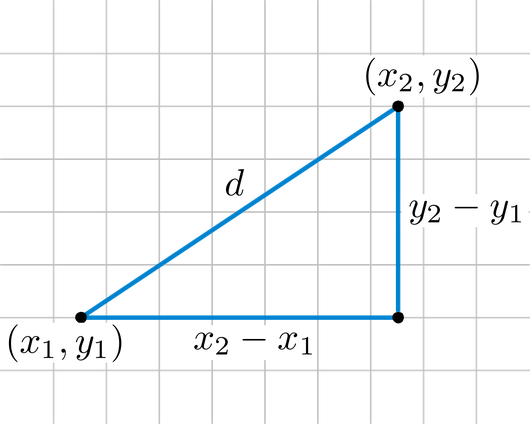

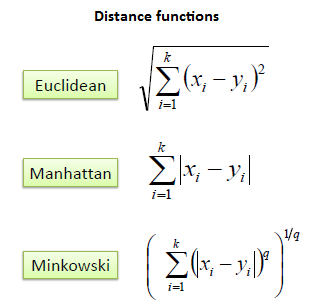

* <b>For categorical variables</b>

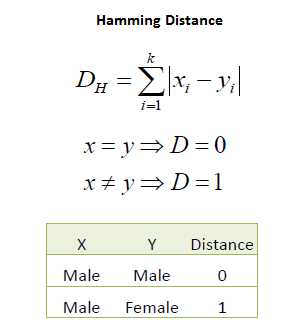

### The second question is, how to choose the k?

* If k is 1, it's called 1-NN.
* In general, a large K value is more precise as it reduces the overall noise but there is no guarantee. 
* Cross-validation is another way to retrospectively determine a good K value by using an independent dataset to validate the K value. 
* The optimal K for most datasets has been between 3-10. 
* Usually it’s an odd number, this way avoiding ties in majority voting

### Direct Distance vs Standardized Distance

* Variables have different measurement scales
* Larger scale variable will have a much higher influence on the direct distance calculated
* So we need to normalize the variables so that their scale is between 0 and 1. Then use the mormalized variables to compute distance (standardized distance)
* This simple technique usually improves your model significantly. 

### Example: Credit risk prediction

Age and Loan are two numerical variables (predictors) and Default is the target.

Our training data is

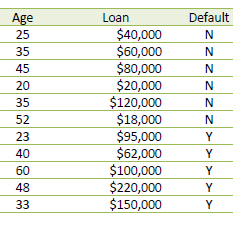

We want to use the training set to classify an unknown case (Age=48 and Loan=$142,000) using Euclidean distance

In KNN, we want to find the k-nearest neighbors and then see the majority of the classes in the k-nearest neighbors.

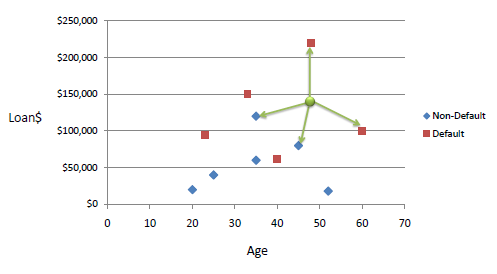

To simply demonstrate how standardized distance will impact the prediction, we will use 1NN.

#### Direct Euclidean Distance

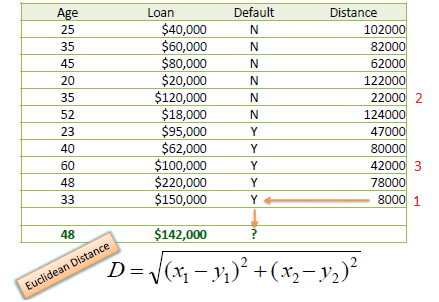

#### Standardized Distance

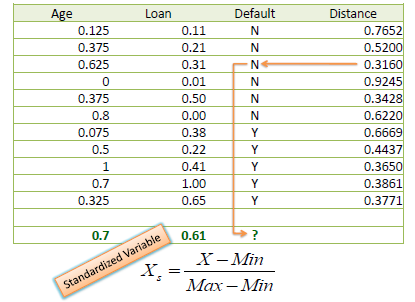

### The steps of the KNN algorithm are,

* If the scales of variable are very different, normalizing the variables can usually improve the model prediction.
* Computes the distance between the new data point with <b>every</b> training example.
* For computing the distance measures such as Euclidean distance, Hamming distance or Manhattan distance will be used.
* Model picks K entries in the database which are closest to the new data point.
* Then it does the majority vote i.e the most common class/label among those K entries will be the class of the new data point.

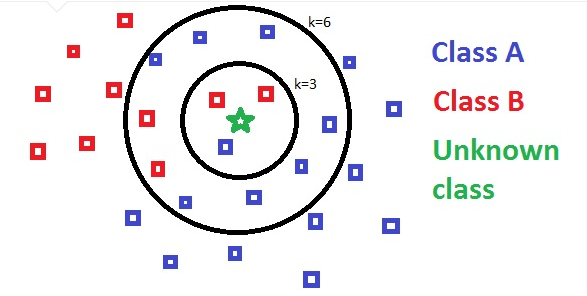

### Example 1: Use KNN to predict cancer



In [1]:
import pandas as pd
import numpy as np
from sklearn import neighbors, preprocessing, model_selection

In [2]:
# read the csv file into our data variable
data = pd.read_csv('breast-cancer-wisconsin.csv')

In [3]:
# delete the unwanted id column
data.drop(['id'], 1, inplace=True)

In [4]:
# make up for missing entries. Give a large number so that they will be far from majority.
data.replace('?', -9999, inplace=True)
data.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [5]:
# get our attributes and classes in place
X = np.array(data.drop(['class'], 1)) # axis{0 or ‘index’, 1 or ‘columns’}, default 0
y = np.array(data['class'])

In [6]:
X

array([[5, 1, 1, ..., 3, 1, 1],
       [5, 4, 4, ..., 3, 2, 1],
       [3, 1, 1, ..., 3, 1, 1],
       ...,
       [5, 10, 10, ..., 8, 10, 2],
       [4, 8, 6, ..., 10, 6, 1],
       [4, 8, 8, ..., 10, 4, 1]], dtype=object)

In [7]:
y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4,
       4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4,
       2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2,
       2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4,
       2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4,
       4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4,
       4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 4,

In [8]:
# split data into training and testing sections
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [9]:
# initialize our classifier
knn = neighbors.KNeighborsClassifier()

In [10]:
# fit the classifier with the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Why do we need to fit a k-nearest neighbors classifier?

* Consistent interface fit() function for all classifiers.
* knn.fit() simply stores the training data.
* knn.fit() builds the data structures and search algorithms to speed up the k-nearest neighbors search.
* knn.fit() also searchs the optimal K and distance measures.

### <font color='red'>Attention: accuracy may be different on each splitting and training</font>

In [11]:
# calculating accuracy with test data
accuracy = knn.score(X_test, y_test)
accuracy

0.9857142857142858

In [12]:
# let's make a prediction
new_tests = np.array([[10, 10, 2, 3, 10, 2, 1, 8, 44], [10, 1, 12, 3, 1, 12, 1, 8, 12], [3, 1, 1, 3, 1, 12, 1, 2, 1]])
new_tests = new_tests.reshape(len(new_tests), -1)
prediction = knn.predict(new_tests)

In [13]:
# print out details
print("Accuracy: ", accuracy)

Accuracy:  0.9857142857142858


In [14]:
print("Predictions:")

for pred in prediction:
    if pred == 2:
        print(pred, "Benign")
    else: print(pred, "Malignant")

Predictions:
4 Malignant
4 Malignant
2 Benign


In [15]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### A side topic: Evaluate classification models: confusion matrix and accuracy 

* A performance measurement method for Machine learning classification. 
* It helps you to the know the performance of the classification model on a set of test data for that the true values and false are known. 
* It helps us find out, how many times our model has given correct or wrong output and of what type. 

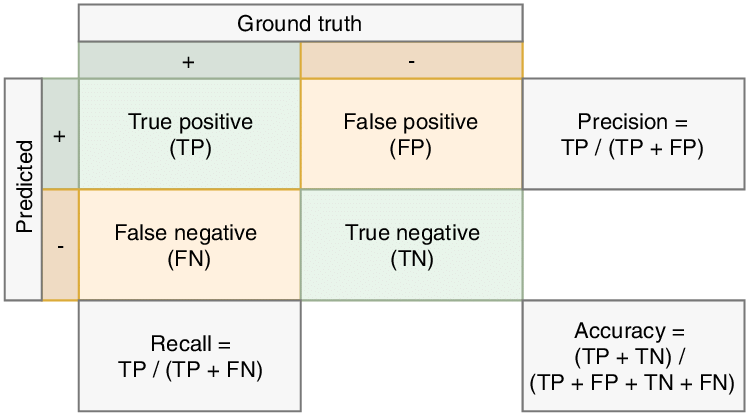

#### There are 4 types of outcomes possible.

* TP: True Positive: Predicted values correctly predicted as actual positive
* FP: False Positive: Predicted values incorrectly predicted an actual positive. i.e., Negative values predicted as positive
* FN: False Negative: Positive values predicted as negative
* TN: True Negative: Predicted values correctly predicted as an actual negative

We can compute the accuracy test from the confusion matrix:

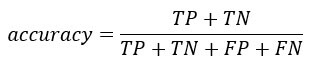

In [16]:
#Confusion Matrix  

from sklearn.metrics import confusion_matrix  
y_pred=knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
cm

array([[101,   2],
       [  0,  37]], dtype=int64)

    Confusion Matrix:
    
    TN FP
    FN TP

#### Our result comes as given above. We can see that,

In [17]:
[[TN,  FP],
[ FN, TP]]=cm

accuracy=(TP+TN)/(TP+TN+FP+FN)
accuracy

0.9857142857142858

In [18]:
knn.score(X_test, y_test)

0.9857142857142858

### Example 2: iris classification

In [19]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'], \
                                                    random_state=0)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# 1NN
knn = KNeighborsClassifier(n_neighbors=1)

In [22]:
# train model KNN
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

#### Making Predictions

In [23]:
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


In [24]:
X_new = X_test[1]
y_new = y_test[1]

print("Test data: {}".format(X_new))
print("Label: {}".format(y_new))

Test data: [6.  2.2 4.  1. ]
Label: 1


In [25]:
# make prediction on new data X_new
prediction = knn.predict([X_new])

In [26]:
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction: [1]
Predicted target name: ['versicolor']


In [27]:
X_new = X_test[2]
y_new = y_test[2]

prediction = knn.predict([X_new])

print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


In [28]:
X_new = X_test[3]
y_new = y_test[3]

prediction = knn.predict([X_new])

print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))

Prediction: [2]
Predicted target name: ['virginica']


#### Evaluating the Model

In [29]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [30]:
import numpy as np

print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


#### Accuracy Score

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9736842105263158

In [32]:
cm=confusion_matrix(y_test, y_pred)  
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

## Multi-class confusion matrix

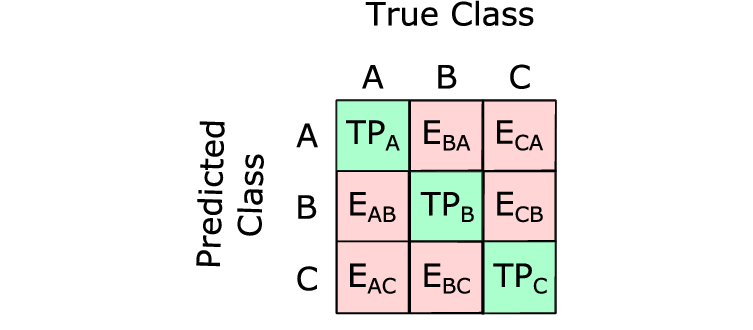

In [33]:
[[TPa, Eba, Eca],
[Eab, TPb, Ecb],
[Eac, Ebc, TPc]]=cm
accuracy=(TPa+TPb+TPc)/sum(cm.flatten())
accuracy

0.9736842105263158

#### Classification Report

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=iris_dataset['target_names']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



* The recall means what percent of the positive cases did you catch.

    * Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.


* The precision will be "what percent of your predictions were correct?"
    
    * Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.


* The f1-score is the harmonic mean between precision & recall. What percent of positive predictions were correct? 

    * The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.
    
    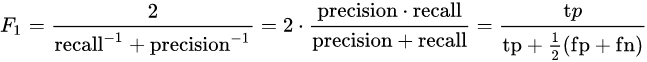


* The support is the number of occurence of the given class in your dataset (so you have 37.5K of class 0 and 37.5K of class 1, which is a really well balanced dataset.


* Attention: precision and recall is highly used for imbalanced dataset because in an highly imbalanced dataset, a 99% accuracy can be meaningless.

In [35]:
15/16 #0.94

0.9375

In [36]:
(1+0.94+1)/3

0.98

In [37]:
(1*13/38+0.94*16/38+1*9/38)

0.9747368421052631

<b>More details:</b> Classification Report: Precision, Recall, F1-Score, Accuracy

https://medium.com/@kennymiyasato/classification-report-precision-recall-f1-score-accuracy-16a245a437a5

### Example 3: Diabetes

### context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.



The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [39]:
df = pd.read_csv('diabetes.csv')

In [40]:
# Print the first 5 roes of the DataFrame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
# shape of the DataFrame
df.shape

(768, 9)

In [42]:
# create numpy arrays for features and target
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [43]:
# importing train_test_split
from sklearn.model_selection import train_test_split

In [44]:
# create a test set of size of 40% of the dataset.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

#### Create KNN Classifier

In [45]:
#  create a classifier using k-Nearest Neighbors algorithm.
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

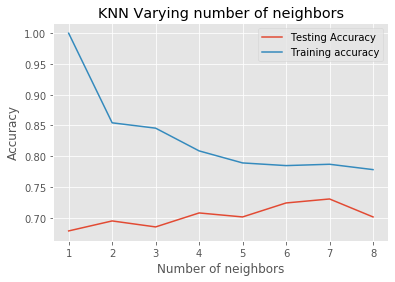

In [46]:
#Generate plot
plt.title('KNN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [47]:
# We can observe above that we get maximum testing accuracy for k=7. 
#So create a KNeighborsClassifier with number of neighbors as 7.

#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [48]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [49]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
print("Accuracy", knn.score(X_test,y_test))

Accuracy 0.7305194805194806


#### Predictions

In [50]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

#### Classification report

In [51]:
#import classification_report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       201
           1       0.62      0.56      0.59       107

    accuracy                           0.73       308
   macro avg       0.70      0.69      0.70       308
weighted avg       0.73      0.73      0.73       308



## Naive Bayes Classification


### Principle of Naive Bayes Classifier

* A probabilistic machine learning model that’s used for classification task
* Based on the Bayes theorem
* Mostly used in sentiment analysis, spam filtering, recommendation systems etc

### Bayes Theorem:

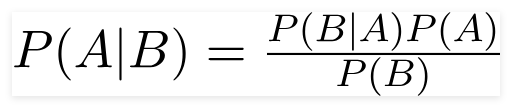

* Find the probability of A happening, given that B has occurred. 
* B is the evidence and A is the hypothesis. 
* Assumption: the features are independent. That is presence of one particular feature does not affect the other. Hence it is called naive.

### In naive bayes classification, Bayes theorem can be rewritten as:

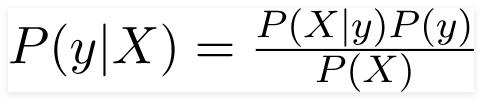

* The variable y is the class variable. Variable X represent the parameters/features.

* X is given as,

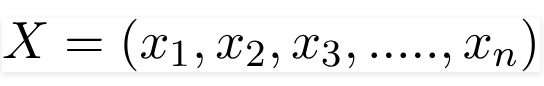

    Here x_1,x_2….x_n represent the features

* Using the chain rule we get

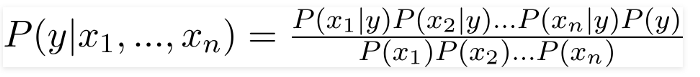

* Removing the static values, it becomes:

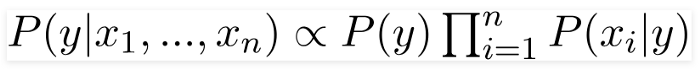

    You can obtain the values for each by counting the frequencies of x_i for each class y in the training data

* Now the problem becomes, we compute the probability for every possible y values and find the class y with maximum probability.

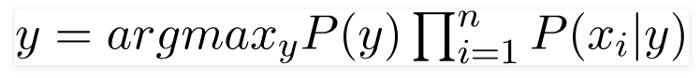

### Types of Naive Bayes Classifier:

#### Multinomial Naive Bayes:

    This is mostly used for document classification problem, i.e whether a document belongs to the category of sports, politics, technology etc. The features/predictors used by the classifier are the frequency of the words present in the document.


#### Bernoulli Naive Bayes:

    This is similar to the multinomial naive bayes but the predictors are boolean variables. The parameters that we use to predict the class variable take up only values yes or no, for example if a word occurs in the text or not.


#### Gaussian Naive Bayes:

    When working with continuous data, an assumption often taken is that the continuous values associated with each class are distributed according to a normal (or Gaussian) distribution. The likelihood of the features is assumed to be
    
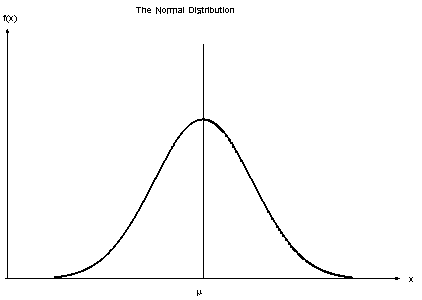

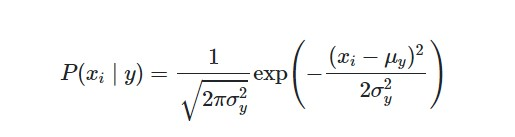

    Gaussian Naive Bayes supports continuous valued features and models each as conforming to a Gaussian (normal) distribution.

* This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all what is needed to define such a distribution.

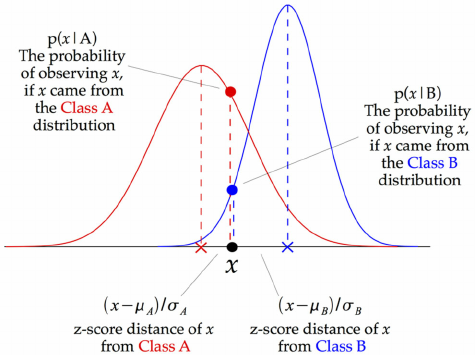

* Then the rest of the work is very simple. At every data point, the z-score distance between that point and each class-mean is calculated, namely the distance from the class mean divided by the standard deviation of that class.

In [52]:
# Using Seaborn library to import Iris dataset
import seaborn as sns

iris = sns.load_dataset('iris')
print("Type", type(iris))

iris.head()

Type <class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\David Li\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


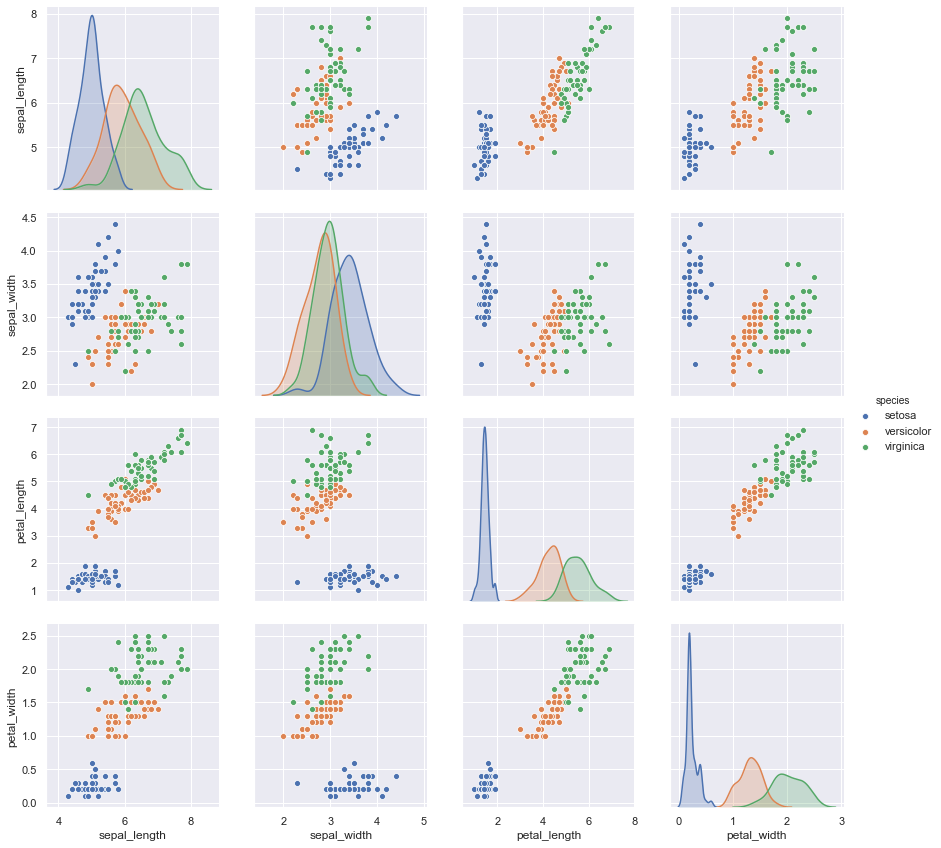

In [53]:
import matplotlib.pyplot as plt

sns.set()
sns.pairplot(iris, hue='species',size=3)
plt.show()

#### Preparing the data

In [54]:
# extract the features matrix and target array from the pandas DataFrame

# feature
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [55]:
# target
y_iris = iris['species']
y_iris.shape

(150,)

### Supervised learning - Iris classification
We will use an extremely simple generative model known as Gaussian naive Bayes.

In [56]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [57]:
ytrain[ytrain.iloc[0:] == 'versicolor'] = 'r'
ytrain[ytrain.iloc[0:] == 'virginica'] = 'g'
ytrain[ytrain.iloc[0:] == 'setosa'] = 'b'

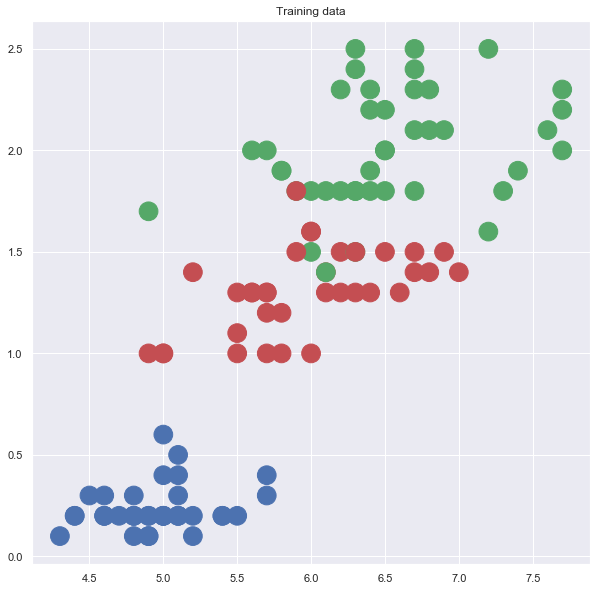

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
# plt.scatter(Xtrain.iloc[:,0:1], Xtrain.iloc[:,3:4], c=list(ytrain[:]), s=350, cmap='viridis')
plt.scatter(Xtrain.iloc[:,0:1], Xtrain.iloc[:,3:4], c=ytrain[:], s=350, cmap='viridis')
plt.title('Training data')
plt.show()

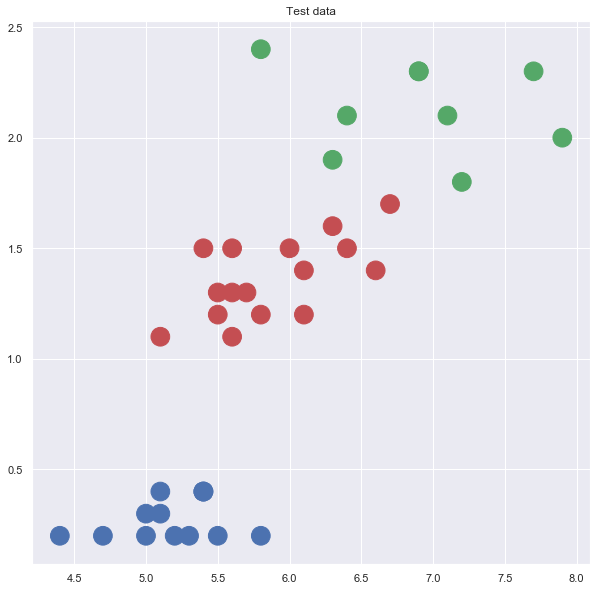

In [59]:
import matplotlib.pyplot as plt

ytest[ytest.iloc[0:] == 'versicolor'] = 'r'
ytest[ytest.iloc[0:] == 'virginica'] = 'g'
ytest[ytest.iloc[0:] == 'setosa'] = 'b'

plt.figure(figsize=(10,10))
plt.scatter(Xtest.iloc[:,0:1], Xtest.iloc[:,3:4], c=ytest[:], s=350, cmap='viridis')
plt.title('Test data')
plt.show()

In [60]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class

model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data

GaussianNB(priors=None, var_smoothing=1e-09)

In [61]:
y_model = model.predict(Xtest)             # 4. predict on new data

In [62]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)

0.9736842105263158

In [63]:
Xtest.head(3)

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4


In [64]:
y_model

array(['b', 'r', 'r', 'b', 'g', 'r', 'g', 'b', 'b', 'g', 'r', 'b', 'g',
       'r', 'r', 'b', 'r', 'r', 'b', 'b', 'r', 'r', 'g', 'b', 'g', 'r',
       'b', 'b', 'r', 'g', 'r', 'g', 'r', 'g', 'g', 'b', 'r', 'b'],
      dtype='<U1')

### Strength and Weakness

#### Strength

* The naive assumption that all features are independent is too strong to be true, the algorithm performs surprisingly good in many cases
* Handles high dimensional data well. Easy to parallelize and handles big data well
* Performs better than more complicated models when the data set is small

#### Weakness

* The estimated probability is often inaccurate because of the naive assumption. 
* Not ideal for regression use or probability estimation
* When data is abundant, other more complicated models tend to outperform Naive Bayes

References

https://www.saedsayad.com/k_nearest_neighbors.htm

https://github.com/chirag16/breast-cancer-sklearn-knn

https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75

https://towardsdatascience.com/k-nearest-neighbor-classifier-from-scratch-in-python-698e3de97063

https://towardsdatascience.com/knn-in-python-835643e2fb53

https://github.com/mrolarik/basic-machine-learning-using-scikit-learn

https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c

https://iq.opengenus.org/gaussian-naive-bayes/

## Lab exercise & homework: Home Loan Default Prediction

Please download the LoanData.rar under today's class announcement. There are two files,

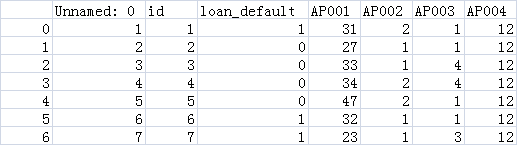

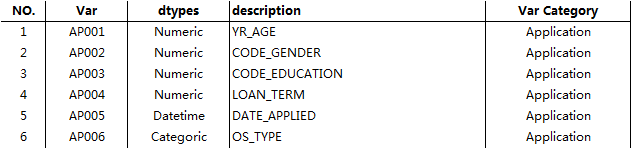

### Your tasks

1. Choose some var columns as features. Explain why you choose those columns. It can be common sense, or statistics.
2. Be careful with those missing data. They can be empty string, -1, -98, -99, etc. You will need to check the data and var dictionary to make your best judgement. 
2. Use those selected columns to predict the "loan_default" column. You will try 3 machine learning algorithms
    * Logistic regression
    * KNN
    * Naive Bayes Classifier
3. For each algorithm, you should select features and fit the model, then predict and evaluate.
4. Try different techniques to improve the model score. You can choose different columns, transform data and normalize data. Show your improvement.
5. Submit all in a Jupyter file and HTML format on canvas